<a href="https://colab.research.google.com/github/anjanay-anjanay/DLNLP/blob/main/Assignment_neuralnetwork_035008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path


In [ ]:
# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/deeplearning"

In [ ]:
# 2.2 Full file path:
path = Path(pathToFolder) / "mobile_price.csv"

In [ ]:
# 3.0 Read data
mobile_price = pd.read_csv(path)
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mobile_price.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# 3.1
mobile_price.shape   # (2000, 21)
mobile_price.dtypes

(2000, 21)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
# 3.2 Get target and predictors:
y = mobile_price.pop("mobile_wt")
X = mobile_price #Convention: predictor in Capital X

In [ ]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [ ]:
# 4.0 Build model:

model = tf.keras.Sequential()

In [ ]:
# Build model
input1 = keras.Input(shape=(X.shape[1],))
input2 = keras.Input(shape=(X.shape[1],))


In [ ]:
# Hidden layers
x1 = layers.Dense(11, activation='sigmoid')(input1)
x2 = layers.Dense(11, activation='sigmoid')(input2)
for _ in range(6):
    x1 = layers.Dense(11, activation='sigmoid')(x1)
    x2 = layers.Dense(11, activation='sigmoid')(x2)

In [ ]:
# Merge the outputs of the two input layers
merged = layers.Concatenate()([x1, x2])

In [ ]:
# Output layer
output = layers.Dense(1)(merged)

In [ ]:
# Create the model with multiple inputs and one output
model = keras.Model(inputs=[input1, input2], outputs=output)

In [ ]:
#4.3 Compile
model.compile( loss = "mae")
#mean absolute error

In [ ]:
# Reshape y to match the expected shape for model training
y = np.array(y).reshape(-1, 1)

# Train the model
model.compile(optimizer='adam', loss='mse')  # Choose an appropriate optimizer and loss function
model.fit([X, X], y, epochs=333)

Epoch 1/333
63/63 [==============================] - 3s 3ms/step - loss: 4603.4482
Epoch 2/333
63/63 [==============================] - 0s 2ms/step - loss: 4446.5806
Epoch 3/333
63/63 [==============================] - 0s 3ms/step - loss: 4295.6064
Epoch 4/333
63/63 [==============================] - 0s 3ms/step - loss: 4147.7915
Epoch 5/333
63/63 [==============================] - 0s 2ms/step - loss: 3988.4685
Epoch 6/333
63/63 [==============================] - 0s 3ms/step - loss: 3822.0664
Epoch 7/333
63/63 [==============================] - 0s 2ms/step - loss: 3676.8623
Epoch 8/333
63/63 [==============================] - 0s 3ms/step - loss: 3542.9175
Epoch 9/333
63/63 [==============================] - 0s 3ms/step - loss: 3416.5396
Epoch 10/333
63/63 [==============================] - 0s 3ms/step - loss: 3295.8220
Epoch 11/333
63/63 [==============================] - 0s 2ms/step - loss: 3180.8457
Epoch 12/333
63/63 [==============================] - 0s 2ms/step - loss: 3071.0891
E

In [ ]:
from tensorflow.keras.utils import plot_model

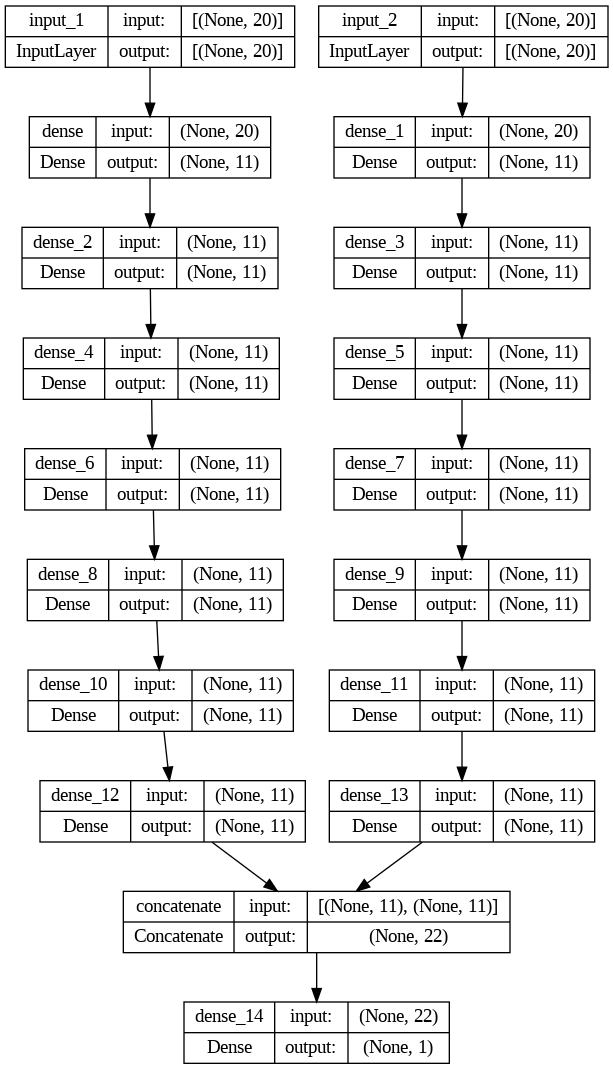

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
#4.3 Compile
model.compile( loss = "mse")
#mean absolute error

In [ ]:
# Reshape y to match the expected shape for model training
y = np.array(y).reshape(-1, 1)

# Train the model
model.compile(optimizer='adam', loss='mse')  # Choose an appropriate optimizer and loss function
model.fit([X, X], y, epochs=111)

Epoch 1/111
63/63 [==============================] - 4s 5ms/step - loss: 1252.7592
Epoch 2/111
63/63 [==============================] - 0s 5ms/step - loss: 1252.5712
Epoch 3/111
63/63 [==============================] - 0s 5ms/step - loss: 1252.7073
Epoch 4/111
63/63 [==============================] - 0s 4ms/step - loss: 1252.5490
Epoch 5/111
63/63 [==============================] - 0s 3ms/step - loss: 1252.5790
Epoch 6/111
63/63 [==============================] - 0s 3ms/step - loss: 1252.6490
Epoch 7/111
63/63 [==============================] - 0s 3ms/step - loss: 1252.6837
Epoch 8/111
63/63 [==============================] - 0s 3ms/step - loss: 1252.5610
Epoch 9/111
63/63 [==============================] - 0s 3ms/step - loss: 1252.5870
Epoch 10/111
63/63 [==============================] - 0s 3ms/step - loss: 1252.6445
Epoch 11/111
63/63 [==============================] - 0s 3ms/step - loss: 1252.5695
Epoch 12/111
63/63 [==============================] - 0s 3ms/step - loss: 1252.5870
E

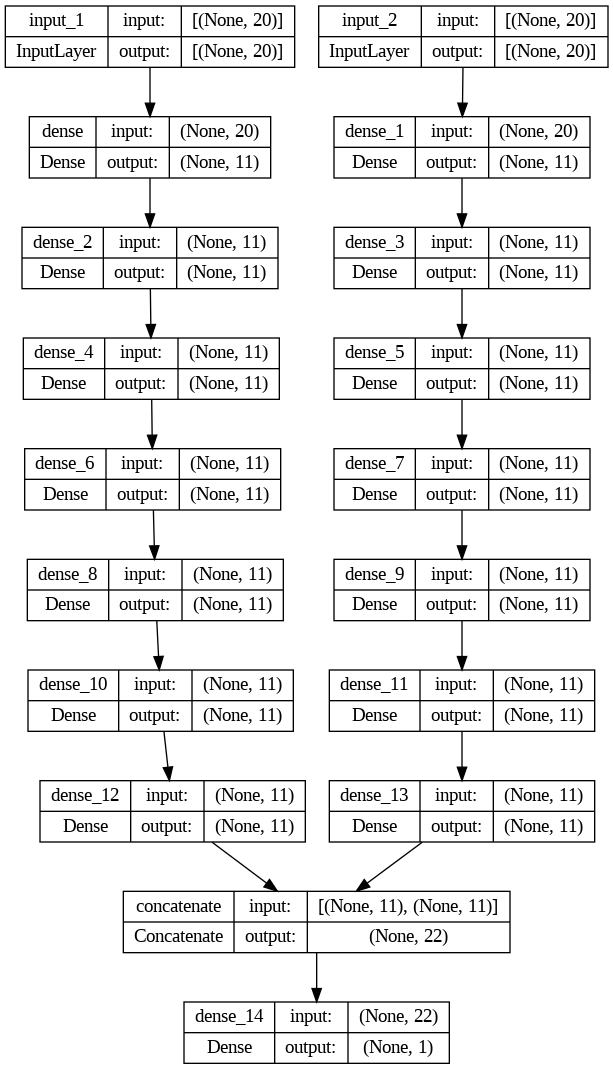

In [ ]:
plot_model(model,show_shapes=True)